# Cross Validation

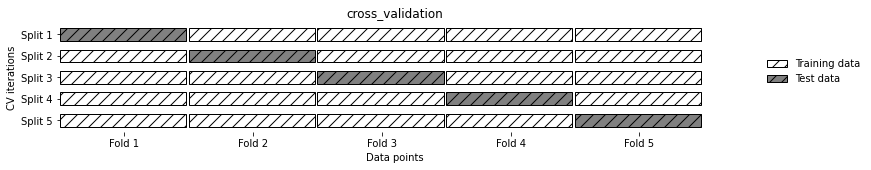

In [2]:
import mglearn
mglearn.plots.plot_cross_validation()

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
model = LogisticRegression(max_iter = 1000)

scores = cross_val_score(model, iris.data, iris.target, cv=5)
print('Cross Validation Scores: {}'.format(scores))

Cross Validation Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [9]:
print('Mean Cross Validation Scores: {:.3f}'.format(scores.mean()))

Mean Cross Validation Scores: 0.973


### Stratified k-folds Cross Validation

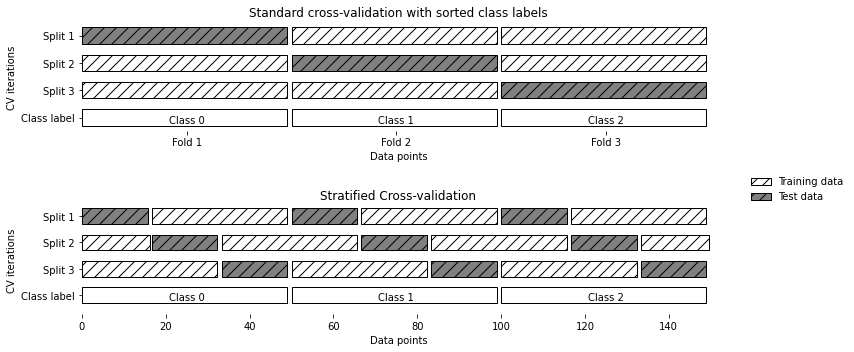

In [1]:
import mglearn
mglearn.plots.plot_stratified_cross_validation()

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

iris = load_iris()
model = LogisticRegression(max_iter = 1000)

In [4]:
kfold = KFold(n_splits=5)
scores = cross_val_score(model, iris.data, iris.target, cv=kfold)
print('Cross Validation Scores: {}'.format(scores))

Cross Validation Scores: [1.         1.         0.86666667 0.93333333 0.83333333]


In [6]:
# Solving the problem with shuffling

# 3 folds without shuffling
kfold = KFold(n_splits=3)
print('Cross Validation Scores: {}'.format(cross_val_score(model, iris.data, iris.target, cv=kfold)))

# 3 folds with shuffling
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print('Cross Validation Scores: {}'.format(cross_val_score(model, iris.data, iris.target, cv=kfold)))

Cross Validation Scores: [0. 0. 0.]
Cross Validation Scores: [0.98 0.96 0.96]


### Leave-one-out Cross Validation

In [8]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(model, iris.data, iris.target, cv=loo)
print('Cross Validation Scores: {:.3f}'.format(scores.mean()))

Cross Validation Scores: 0.967


### Shuffle-Split Cross Validation

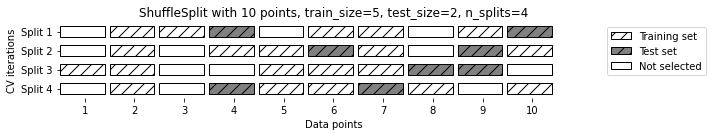

In [16]:
import mglearn
mglearn.plots.plot_shuffle_split()

In [15]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = [round(i,3) for i in cross_val_score(model, iris.data, iris.target, cv=ss)]
print('Cross Validation Scores: {}'.format(scores))

Cross Validation Scores: [0.96, 0.987, 0.96, 0.973, 0.947, 0.973, 0.987, 0.987, 0.973, 0.973]


### Cross Validation with Groups

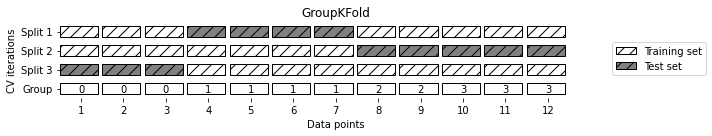

In [17]:
mglearn.plots.plot_group_kfold()

In [22]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=12, random_state=0)

groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(model, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print('Cross Validation Scores: {}'.format(scores))

Cross Validation Scores: [0.75       0.6        0.66666667]


# Grid Search
### Simple Grid Search

In [1]:
# importing and splitting the dataset

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print('Size of:\nTraining set = {}\nTest set = {}\nValidation set = {}'.format(X_train.shape, X_valid.shape, X_test.shape))

Size of:
Training set = (84, 4)
Test set = (28, 4)
Validation set = (38, 4)


In [2]:
# Applying simple grid search

from sklearn.svm import SVC

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        model = SVC(gamma=gamma, C=C).fit(X_train, y_train)
        score = model.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma, 'C': C}
            
print('Best Score: {:.2f}'.format(best_score))
print('Best Parameters:', best_parameters)

model = SVC(**best_parameters).fit(X_train, y_train)
print('Test Set Score: {:.2f}'.format(model.score(X_test, y_test)))

Best Score: 0.96
Best Parameters: {'gamma': 0.001, 'C': 10}
Test Set Score: 0.89


### GridSearchCV class

In [3]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5).fit(X_train, y_train)

print('Best Score: {:.2f}'.format(grid_search.best_score_))
print('Best Parameters:', grid_search.best_params_)

print('Test Set Score: {:.2f}'.format(grid_search.score(X_test, y_test)))

Best Score: 0.99
Best Parameters: {'C': 10, 'gamma': 0.1}
Test Set Score: 0.97


In [4]:
print('Best Estimator: {}'.format(grid_search.best_estimator_))

Best Estimator: SVC(C=10, gamma=0.1)


### Analysing Result

In [7]:
import pandas as pd

result = pd.DataFrame(grid_search.cv_results_)
display(result.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000609,0.000064,0.000284,0.000017,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.352941,0.352941,0.647059,0.647059,0.3125,0.462500,0.151413,22
1,0.000618,0.000119,0.000274,0.000009,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.352941,0.352941,0.647059,0.647059,0.3125,0.462500,0.151413,22
2,0.000613,0.000134,0.000304,0.000072,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.352941,0.352941,0.647059,0.647059,0.3125,0.462500,0.151413,22
3,0.000555,0.000018,0.000264,0.000004,0.001,1,"{'C': 0.001, 'gamma': 1}",0.352941,0.352941,0.647059,0.647059,0.3125,0.462500,0.151413,22
4,0.000488,0.000019,0.000230,0.000003,0.001,10,"{'C': 0.001, 'gamma': 10}",0.352941,0.352941,0.647059,0.588235,0.3125,0.450735,0.138337,31


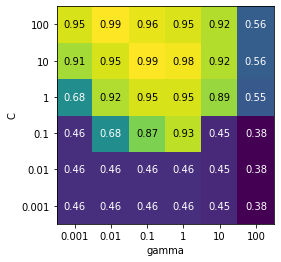

In [11]:
# plotting a heatmap out of the results
import numpy as np
import mglearn

scores = np.array(result.mean_test_score).reshape(6,6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

# Evaluation and Scoring
### Metrics for Binary Classification

In [2]:
# importing the dataset and training LogisticRegression reaction

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

/home/sanket/.local/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [4]:
# accuracy

print('Dummy Classifier Score: {:.2f}'.format(dummy.score(X_test, y_test)))
print('LogisticRegression Classifier Score: {:.2f}'.format(logreg.score(X_test, y_test)))

Dummy Classifier Score: 0.84
LogisticRegression Classifier Score: 0.98


Dummy Classifier:
[[360  43]
 [ 44   3]]
LinearRegression Classifier:
[[402   1]
 [  6  41]]


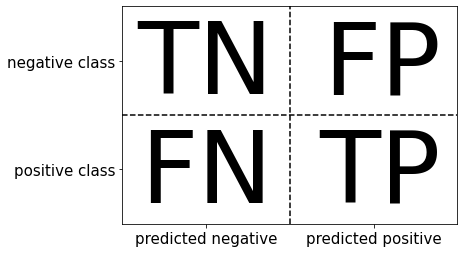

In [7]:
#confusion matrix

import mglearn
from sklearn.metrics import confusion_matrix

mglearn.plots.plot_binary_confusion_matrix()

print('Dummy Classifier:')
print(confusion_matrix(y_test, pred_dummy))
print('LinearRegression Classifier:')
print(confusion_matrix(y_test, pred_logreg))

In [9]:
# f1-score ( = (2 * precision * recall) / (precision + recall))

from sklearn.metrics import f1_score

print('f1-score of Dummy Classifier: {:.2f}'.format(f1_score(y_test, pred_dummy)))
print('f1-score of LogisticRegression Classifier: {:.2f}'.format(f1_score(y_test, pred_logreg)))

f1-score of Dummy Classifier: 0.06
f1-score of LogisticRegression Classifier: 0.92


In [12]:
# classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99       403
        True       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



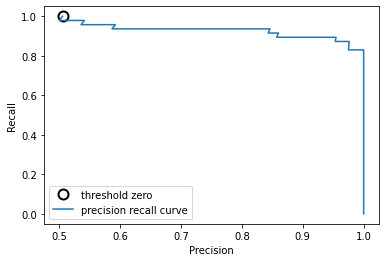

In [15]:
# precision_recall_curve

from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

precision, recall, threshold = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:, 1])
close_zero = np.argmin(np.abs(threshold))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')

In [17]:
# average_precision_score

from sklearn.metrics import average_precision_score
average_precision_score(y_test, logreg.predict_proba(X_test)[:, 1])

0.9627905874642446

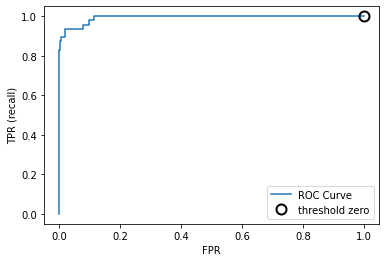

In [20]:
# roc_curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR (recall)')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc='best')

In [21]:
# auc score

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

0.9928726044031466